## **Image Augmentation code using AugLy**

In [ ]:
### Check file counts (ORIGINAL IMAGES)

import pandas as pd
from os import walk

directory = 'german/train'
_, dirs, _ = next(walk(directory))
folders_list = []
for folder in dirs:
    folder_path = '{}/{}'.format(directory, folder)
    _, _, file_names = next(walk(folder_path))
    folders_list.append(len(file_names))
    
df_folders = pd.DataFrame({'folder_name':dirs, 'files_count': folders_list})
12
# total_files = df_folders['files_count'].sum()
df_folders['completion'] = 1000 - df_folders['files_count']
df_folders.sort_values(by='files_count', inplace=True)
df_folders.reset_index(inplace=True)
del df_folders['index']
df_folders

,folder_name,files_count,completion
0,0,1000,0
1,3,1000,0
2,30,1000,0
3,31,1000,0
4,32,1000,0
5,33,1000,0
6,34,1000,0
7,35,1000,0
8,36,1000,0
9,29,1000,0


In [ ]:
import os
DATA_DIR_TRAIN = "german/train"
files = []
categories_list = []
for i in range(43):
    category = str(i)
    path = os.path.join(DATA_DIR_TRAIN, category)
    files = []
    for p in os.listdir(path):
        img_path = os.path.join(path, p)
        files.append(img_path)
    categories_list.append((i, files))

In [ ]:
import random
for i in range(31, len(df_folders)):
    folder_name = int(df_folders['folder_name'][i])
    number_to_remove = df_folders['to_remove'][i]
    list_to_remove = categories_list[folder_name][1]
    
    print('folder_name: ', folder_name, ' number_to_remove: ', number_to_remove)
    for j in range(number_to_remove):    
        image_path = random.choice(list_to_remove)
        try:
            os.remove(image_path)
        except:
            continue

folder_name:  8  number_to_remove:  1
folder_name:  18  number_to_remove:  1
folder_name:  25  number_to_remove:  2
folder_name:  7  number_to_remove:  2
folder_name:  5  number_to_remove:  5
folder_name:  4  number_to_remove:  6
folder_name:  12  number_to_remove:  6
folder_name:  1  number_to_remove:  6
folder_name:  13  number_to_remove:  6
folder_name:  10  number_to_remove:  7
folder_name:  38  number_to_remove:  9
folder_name:  2  number_to_remove:  11


In [ ]:
folder_name

2

In [ ]:
categories_list[folder_name][1]

['german/train\\2\\00002_00000_00000.png',
 'german/train\\2\\00002_00000_00001.png',
 'german/train\\2\\00002_00000_00002.png',
 'german/train\\2\\00002_00000_00003.png',
 'german/train\\2\\00002_00000_00004.png',
 'german/train\\2\\00002_00000_00005.png',
 'german/train\\2\\00002_00000_00006.png',
 'german/train\\2\\00002_00000_00007.png',
 'german/train\\2\\00002_00000_00008.png',
 'german/train\\2\\00002_00000_00009.png',
 'german/train\\2\\00002_00000_00010.png',
 'german/train\\2\\00002_00000_00011.png',
 'german/train\\2\\00002_00000_00012.png',
 'german/train\\2\\00002_00000_00013.png',
 'german/train\\2\\00002_00000_00014.png',
 'german/train\\2\\00002_00000_00015.png',
 'german/train\\2\\00002_00000_00016.png',
 'german/train\\2\\00002_00000_00017.png',
 'german/train\\2\\00002_00000_00018.png',
 'german/train\\2\\00002_00000_00019.png',
 'german/train\\2\\00002_00000_00020.png',
 'german/train\\2\\00002_00000_00021.png',
 'german/train\\2\\00002_00000_00022.png',
 'german/tr

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage import io, color, exposure, transform
import os
import glob
import h5py

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, model_from_json
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras import backend as K
K.set_image_data_format('channels_first')

from matplotlib import pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by cli

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
NUM_CLASSES = 43
IMG_SIZE = 48

In [ ]:
def preprocess_img(img):
    # Histogram normalization in y
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

    # central scrop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE))

    # roll color axis to axis 0
    img = np.rollaxis(img,-1)

    return img

In [ ]:
import cv2
import os
DATA_DIR_TRAIN = "german/train"
x_train = []
y_train = []
for i in range(43):
    category = str(i)
    path = os.path.join(DATA_DIR_TRAIN, category)
    print(path)
    
    for p in os.listdir(path):
        img_path = os.path.join(path, p)
        img = cv2.imread(img_path)
        new_img = preprocess_img(img)
        x_train.append(new_img)
        y_train.append(i)

german/train\0
german/train\1
german/train\2
german/train\3
german/train\4
german/train\5
german/train\6
german/train\7
german/train\8
german/train\9
german/train\10
german/train\11
german/train\12
german/train\13


KeyboardInterrupt: 

In [ ]:
# Augly functions
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display

# def scale(image, output_path):
#     return imaugs.scale(image, factor=0.8, output_path = output_path)

def saturate(image, output_path):
    return imaugs.saturation(image, factor=1.5, output_path = output_path)

def shuffle(image, output_path):
    return imaugs.shuffle_pixels(image, factor=0.3, output_path = output_path)

def pixelization(image, output_path):
    return imaugs.pixelization(image, ratio=0.8, output_path = output_path)

def rotate(image, output_path):
    return imaugs.rotate(image, degrees=random.randint(0,180), output_path = output_path)

# def blur(image, output_path):
#     return imaugs.blur(image, radius=5, output_path = output_path)

def car(image, output_path):
    return imaugs.change_aspect_ratio(image, ratio=random.randint(3,6), output_path = output_path)

def sharpen(image, output_path):
    return imaugs.sharpen(image, factor=random.randint(1,10), output_path = output_path)

# def pt(image, output_path):
#     return imaugs.perspective_transform(image, sigma=random.randint(20, 50), output_path = output_path)

In [ ]:
# images

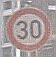

In [ ]:
from IPython.display import Image
sharpen(images[0], 'german/test_0.png')
Image(filename='german/test_0.png')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
from augly.image import aug_np_wrapper
from tqdm import tqdm as tq

transformations = {
#                     'scale': scale,
                   'saturate': saturate,
                   'shuffle': shuffle,
                   'pixelization': pixelization,
                   'rotate': rotate,
#                    'blur': blur,
                   'car': car,
                   'sharpen': sharpen
#                    'perspective_transform': pt
                  }

category = 'german/Train_original'

# folder_name = 
# number_to_remove = df_folders['to_remove'][i]

cat_d = df_folders['folder_name']
cat_n = df_folders['completion']

for i in tq(range(0, 1)):
# for i in tq(range(0, 1)):
    images_path = "{}/{}".format(category, cat_d[i]) #path to original images
    augmented_path =  "german/Train/{}".format(cat_d[i])  #path to store aumented images
#     print('augmented_path: ', augmented_path)
#     print('images_path: ', images_path)
    
    images=[]
#     os.makedirs(augmented_path, exist_ok=True)  # create directory if not existing

    for im in os.listdir(images_path):      
        images.append(os.path.join(images_path, im))
    
    for j in tq(range(0, cat_n[i])):
        image = random.choice(images)
        original_image = Image.open(image)
        transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image

        for n in range(0, transformation_count):
            t_key = random.choice(list(transformations)) #randomly choosing method to call
            output_path= "%s/%s_A%s.jpg" %(augmented_path, cat_d[i], j)
            transformations[t_key](original_image, output_path) 

 93%|█████████▎| 733/791 [00:20<00:01, 55.88it/s]


100%|██████████| 1/1 [00:22<00:00, 22.56s/it]
